In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BHP
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


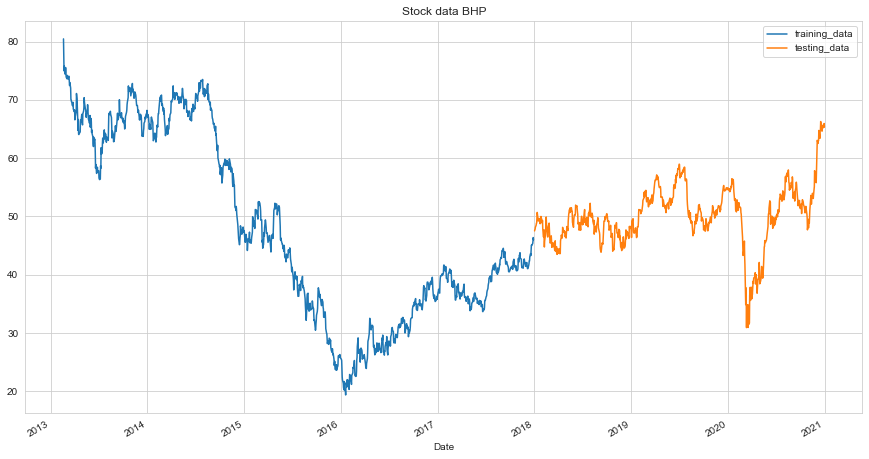

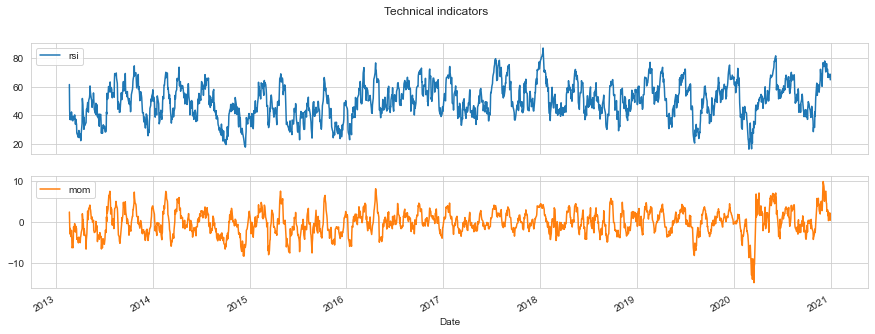

In [2]:
stock_name = 'bhp'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 947.38, duration: 0:00:00.190145
episode: 2/2000, episode end value: 1009.36, duration: 0:00:00.187056
episode: 3/2000, episode end value: 989.68, duration: 0:00:00.190055
episode: 4/2000, episode end value: 958.51, duration: 0:00:00.220029
episode: 5/2000, episode end value: 989.81, duration: 0:00:00.210056
episode: 6/2000, episode end value: 965.25, duration: 0:00:00.202046
episode: 7/2000, episode end value: 1061.64, duration: 0:00:00.190550
episode: 8/2000, episode end value: 938.67, duration: 0:00:00.176031
episode: 9/2000, episode end value: 1019.05, duration: 0:00:00.184151
episode: 10/2000, episode end value: 927.80, duration: 0:00:00.187061
episode: 11/2000, episode end value: 1003.31, duration: 0:00:00.184059
episode: 12/2000, episode end value: 962.02, duration: 0:00:00.188857
episode: 13/2000, episode end value: 966.41, duration: 0:00:00.225459
episode: 14/2000, episode end value: 1042.21, duration: 0:00:00.204051
episode: 15/2000, episod

episode: 118/2000, episode end value: 956.95, duration: 0:00:00.205055
episode: 119/2000, episode end value: 966.30, duration: 0:00:00.195037
episode: 120/2000, episode end value: 957.06, duration: 0:00:00.201053
episode: 121/2000, episode end value: 963.83, duration: 0:00:00.196046
episode: 122/2000, episode end value: 941.10, duration: 0:00:00.200044
episode: 123/2000, episode end value: 1018.31, duration: 0:00:00.204051
episode: 124/2000, episode end value: 965.00, duration: 0:00:00.197038
episode: 125/2000, episode end value: 930.32, duration: 0:00:00.200038
episode: 126/2000, episode end value: 955.07, duration: 0:00:00.202013
episode: 127/2000, episode end value: 935.89, duration: 0:00:00.197037
episode: 128/2000, episode end value: 984.83, duration: 0:00:00.209034
episode: 129/2000, episode end value: 952.15, duration: 0:00:00.202043
episode: 130/2000, episode end value: 951.16, duration: 0:00:00.204060
episode: 131/2000, episode end value: 959.28, duration: 0:00:00.195041
episo

episode: 234/2000, episode end value: 949.68, duration: 0:00:00.218053
episode: 235/2000, episode end value: 965.58, duration: 0:00:00.223047
episode: 236/2000, episode end value: 1019.06, duration: 0:00:00.237067
episode: 237/2000, episode end value: 1016.09, duration: 0:00:00.224038
episode: 238/2000, episode end value: 926.37, duration: 0:00:00.214051
episode: 239/2000, episode end value: 1057.82, duration: 0:00:00.225059
episode: 240/2000, episode end value: 1010.94, duration: 0:00:00.220035
episode: 241/2000, episode end value: 961.32, duration: 0:00:00.229051
episode: 242/2000, episode end value: 940.15, duration: 0:00:00.214063
episode: 243/2000, episode end value: 976.13, duration: 0:00:00.218033
episode: 244/2000, episode end value: 989.54, duration: 0:00:00.218066
episode: 245/2000, episode end value: 972.89, duration: 0:00:00.221041
episode: 246/2000, episode end value: 1022.09, duration: 0:00:00.231054
episode: 247/2000, episode end value: 979.75, duration: 0:00:00.223047
e

episode: 349/2000, episode end value: 983.36, duration: 0:00:00.237051
episode: 350/2000, episode end value: 1030.97, duration: 0:00:00.258047
episode: 351/2000, episode end value: 996.70, duration: 0:00:00.252055
episode: 352/2000, episode end value: 1009.71, duration: 0:00:00.261059
episode: 353/2000, episode end value: 1016.65, duration: 0:00:00.240053
episode: 354/2000, episode end value: 1031.36, duration: 0:00:00.259626
episode: 355/2000, episode end value: 974.65, duration: 0:00:00.276376
episode: 356/2000, episode end value: 996.14, duration: 0:00:00.247051
episode: 357/2000, episode end value: 991.56, duration: 0:00:00.250054
episode: 358/2000, episode end value: 1041.04, duration: 0:00:00.251054
episode: 359/2000, episode end value: 1003.72, duration: 0:00:00.262059
episode: 360/2000, episode end value: 1003.72, duration: 0:00:00.266059
episode: 361/2000, episode end value: 1015.84, duration: 0:00:00.270065
episode: 362/2000, episode end value: 1009.41, duration: 0:00:00.2470

episode: 464/2000, episode end value: 1019.25, duration: 0:00:00.302065
episode: 465/2000, episode end value: 988.92, duration: 0:00:00.313070
episode: 466/2000, episode end value: 970.53, duration: 0:00:00.269061
episode: 467/2000, episode end value: 966.90, duration: 0:00:00.278062
episode: 468/2000, episode end value: 959.14, duration: 0:00:00.291067
episode: 469/2000, episode end value: 969.50, duration: 0:00:00.292064
episode: 470/2000, episode end value: 1007.16, duration: 0:00:00.299071
episode: 471/2000, episode end value: 964.45, duration: 0:00:00.283062
episode: 472/2000, episode end value: 957.96, duration: 0:00:00.337078
episode: 473/2000, episode end value: 958.51, duration: 0:00:00.300066
episode: 474/2000, episode end value: 944.12, duration: 0:00:00.332074
episode: 475/2000, episode end value: 994.13, duration: 0:00:00.307070
episode: 476/2000, episode end value: 956.28, duration: 0:00:00.348082
episode: 477/2000, episode end value: 1013.99, duration: 0:00:00.318067
epi

episode: 579/2000, episode end value: 1002.31, duration: 0:00:00.499110
episode: 580/2000, episode end value: 1217.94, duration: 0:00:00.399091
episode: 581/2000, episode end value: 950.90, duration: 0:00:00.399094
episode: 582/2000, episode end value: 1012.56, duration: 0:00:00.380087
episode: 583/2000, episode end value: 1120.30, duration: 0:00:00.455915
episode: 584/2000, episode end value: 967.81, duration: 0:00:00.364784
episode: 585/2000, episode end value: 1027.92, duration: 0:00:00.397090
episode: 586/2000, episode end value: 1204.68, duration: 0:00:00.436099
episode: 587/2000, episode end value: 960.01, duration: 0:00:00.391086
episode: 588/2000, episode end value: 953.16, duration: 0:00:00.455103
episode: 589/2000, episode end value: 945.88, duration: 0:00:00.440603
episode: 590/2000, episode end value: 945.84, duration: 0:00:00.374104
episode: 591/2000, episode end value: 935.66, duration: 0:00:00.388090
episode: 592/2000, episode end value: 1093.09, duration: 0:00:00.370078

episode: 694/2000, episode end value: 950.20, duration: 0:00:00.495111
episode: 695/2000, episode end value: 934.24, duration: 0:00:00.436097
episode: 696/2000, episode end value: 1015.18, duration: 0:00:00.452101
episode: 697/2000, episode end value: 969.41, duration: 0:00:00.424094
episode: 698/2000, episode end value: 1014.36, duration: 0:00:00.450100
episode: 699/2000, episode end value: 991.54, duration: 0:00:00.351086
episode: 700/2000, episode end value: 1002.32, duration: 0:00:00.404087
episode: 701/2000, episode end value: 1006.51, duration: 0:00:00.445100
episode: 702/2000, episode end value: 1031.85, duration: 0:00:00.387085
episode: 703/2000, episode end value: 970.48, duration: 0:00:00.345076
episode: 704/2000, episode end value: 998.44, duration: 0:00:00.411090
episode: 705/2000, episode end value: 966.07, duration: 0:00:00.372083
episode: 706/2000, episode end value: 955.85, duration: 0:00:00.388092
episode: 707/2000, episode end value: 921.10, duration: 0:00:00.360077
e

episode: 809/2000, episode end value: 975.44, duration: 0:00:00.414284
episode: 810/2000, episode end value: 944.44, duration: 0:00:00.444845
episode: 811/2000, episode end value: 1038.79, duration: 0:00:00.444100
episode: 812/2000, episode end value: 952.29, duration: 0:00:00.416097
episode: 813/2000, episode end value: 969.42, duration: 0:00:00.444102
episode: 814/2000, episode end value: 952.69, duration: 0:00:00.389084
episode: 815/2000, episode end value: 963.86, duration: 0:00:00.391086
episode: 816/2000, episode end value: 935.61, duration: 0:00:00.360082
episode: 817/2000, episode end value: 1047.10, duration: 0:00:00.394090
episode: 818/2000, episode end value: 966.81, duration: 0:00:00.368083
episode: 819/2000, episode end value: 989.14, duration: 0:00:00.436097
episode: 820/2000, episode end value: 1011.73, duration: 0:00:00.425095
episode: 821/2000, episode end value: 996.09, duration: 0:00:00.418098
episode: 822/2000, episode end value: 989.95, duration: 0:00:00.445097
epi

episode: 924/2000, episode end value: 947.98, duration: 0:00:00.436100
episode: 925/2000, episode end value: 988.75, duration: 0:00:00.378092
episode: 926/2000, episode end value: 1035.33, duration: 0:00:00.444098
episode: 927/2000, episode end value: 961.43, duration: 0:00:00.453103
episode: 928/2000, episode end value: 982.45, duration: 0:00:00.467103
episode: 929/2000, episode end value: 981.47, duration: 0:00:00.382090
episode: 930/2000, episode end value: 945.65, duration: 0:00:00.331073
episode: 931/2000, episode end value: 991.97, duration: 0:00:00.347079
episode: 932/2000, episode end value: 992.54, duration: 0:00:00.401090
episode: 933/2000, episode end value: 962.40, duration: 0:00:00.383079
episode: 934/2000, episode end value: 986.25, duration: 0:00:00.387089
episode: 935/2000, episode end value: 929.23, duration: 0:00:00.393088
episode: 936/2000, episode end value: 1029.07, duration: 0:00:00.363078
episode: 937/2000, episode end value: 953.60, duration: 0:00:00.416094
epis

episode: 1039/2000, episode end value: 979.85, duration: 0:00:00.465111
episode: 1040/2000, episode end value: 977.31, duration: 0:00:00.440099
episode: 1041/2000, episode end value: 990.63, duration: 0:00:00.477107
episode: 1042/2000, episode end value: 941.68, duration: 0:00:00.426095
episode: 1043/2000, episode end value: 967.21, duration: 0:00:00.477108
episode: 1044/2000, episode end value: 1017.89, duration: 0:00:00.417093
episode: 1045/2000, episode end value: 998.37, duration: 0:00:00.396088
episode: 1046/2000, episode end value: 961.49, duration: 0:00:00.401091
episode: 1047/2000, episode end value: 942.22, duration: 0:00:00.389087
episode: 1048/2000, episode end value: 969.14, duration: 0:00:00.448099
episode: 1049/2000, episode end value: 973.53, duration: 0:00:00.490110
episode: 1050/2000, episode end value: 985.92, duration: 0:00:00.435098
episode: 1051/2000, episode end value: 943.03, duration: 0:00:00.418091
episode: 1052/2000, episode end value: 926.07, duration: 0:00:0

episode: 1153/2000, episode end value: 1020.00, duration: 0:00:00.513114
episode: 1154/2000, episode end value: 983.37, duration: 0:00:00.483110
episode: 1155/2000, episode end value: 950.76, duration: 0:00:00.470102
episode: 1156/2000, episode end value: 1034.40, duration: 0:00:00.478107
episode: 1157/2000, episode end value: 975.72, duration: 0:00:00.407090
episode: 1158/2000, episode end value: 987.41, duration: 0:00:00.465107
episode: 1159/2000, episode end value: 1014.45, duration: 0:00:00.408093
episode: 1160/2000, episode end value: 939.22, duration: 0:00:00.427095
episode: 1161/2000, episode end value: 950.99, duration: 0:00:00.465103
episode: 1162/2000, episode end value: 1032.15, duration: 0:00:00.431103
episode: 1163/2000, episode end value: 949.64, duration: 0:00:00.418094
episode: 1164/2000, episode end value: 1038.85, duration: 0:00:00.441099
episode: 1165/2000, episode end value: 929.66, duration: 0:00:00.426098
episode: 1166/2000, episode end value: 989.10, duration: 0:

episode: 1267/2000, episode end value: 932.00, duration: 0:00:00.302068
episode: 1268/2000, episode end value: 922.82, duration: 0:00:00.262058
episode: 1269/2000, episode end value: 1127.23, duration: 0:00:00.307070
episode: 1270/2000, episode end value: 978.68, duration: 0:00:00.330074
episode: 1271/2000, episode end value: 1051.04, duration: 0:00:00.416093
episode: 1272/2000, episode end value: 974.98, duration: 0:00:00.367083
episode: 1273/2000, episode end value: 1010.48, duration: 0:00:00.423095
episode: 1274/2000, episode end value: 1015.50, duration: 0:00:00.482108
episode: 1275/2000, episode end value: 934.82, duration: 0:00:00.497112
episode: 1276/2000, episode end value: 935.43, duration: 0:00:00.446099
episode: 1277/2000, episode end value: 1020.16, duration: 0:00:00.398093
episode: 1278/2000, episode end value: 1011.65, duration: 0:00:00.395086
episode: 1279/2000, episode end value: 1005.31, duration: 0:00:00.408090
episode: 1280/2000, episode end value: 969.66, duration: 

episode: 1381/2000, episode end value: 977.96, duration: 0:00:00.404094
episode: 1382/2000, episode end value: 934.85, duration: 0:00:00.376080
episode: 1383/2000, episode end value: 956.38, duration: 0:00:00.418094
episode: 1384/2000, episode end value: 990.86, duration: 0:00:00.447100
episode: 1385/2000, episode end value: 971.32, duration: 0:00:00.384087
episode: 1386/2000, episode end value: 964.28, duration: 0:00:00.406091
episode: 1387/2000, episode end value: 943.79, duration: 0:00:00.402090
episode: 1388/2000, episode end value: 954.30, duration: 0:00:00.365081
episode: 1389/2000, episode end value: 959.83, duration: 0:00:00.439100
episode: 1390/2000, episode end value: 934.62, duration: 0:00:00.351078
episode: 1391/2000, episode end value: 940.38, duration: 0:00:00.453107
episode: 1392/2000, episode end value: 971.91, duration: 0:00:00.496109
episode: 1393/2000, episode end value: 977.51, duration: 0:00:00.416093
episode: 1394/2000, episode end value: 930.92, duration: 0:00:00

episode: 1495/2000, episode end value: 973.76, duration: 0:00:00.454112
episode: 1496/2000, episode end value: 983.77, duration: 0:00:00.401087
episode: 1497/2000, episode end value: 937.16, duration: 0:00:00.439095
episode: 1498/2000, episode end value: 960.74, duration: 0:00:00.391092
episode: 1499/2000, episode end value: 943.76, duration: 0:00:00.403085
episode: 1500/2000, episode end value: 1012.40, duration: 0:00:00.386087
episode: 1501/2000, episode end value: 956.52, duration: 0:00:00.389090
episode: 1502/2000, episode end value: 973.24, duration: 0:00:00.401091
episode: 1503/2000, episode end value: 969.12, duration: 0:00:00.417093
episode: 1504/2000, episode end value: 975.08, duration: 0:00:00.381085
episode: 1505/2000, episode end value: 1017.32, duration: 0:00:00.464104
episode: 1506/2000, episode end value: 959.49, duration: 0:00:00.418093
episode: 1507/2000, episode end value: 1009.96, duration: 0:00:00.477106
episode: 1508/2000, episode end value: 960.31, duration: 0:00

episode: 1609/2000, episode end value: 972.56, duration: 0:00:00.384088
episode: 1610/2000, episode end value: 967.23, duration: 0:00:00.404092
episode: 1611/2000, episode end value: 968.95, duration: 0:00:00.353083
episode: 1612/2000, episode end value: 976.11, duration: 0:00:00.419094
episode: 1613/2000, episode end value: 969.90, duration: 0:00:00.430096
episode: 1614/2000, episode end value: 1037.01, duration: 0:00:00.406095
episode: 1615/2000, episode end value: 993.32, duration: 0:00:00.373081
episode: 1616/2000, episode end value: 992.51, duration: 0:00:00.428096
episode: 1617/2000, episode end value: 982.94, duration: 0:00:00.339076
episode: 1618/2000, episode end value: 1021.40, duration: 0:00:00.470106
episode: 1619/2000, episode end value: 963.84, duration: 0:00:00.333077
episode: 1620/2000, episode end value: 944.84, duration: 0:00:00.405091
episode: 1621/2000, episode end value: 969.88, duration: 0:00:00.420096
episode: 1622/2000, episode end value: 953.14, duration: 0:00:

episode: 1723/2000, episode end value: 977.79, duration: 0:00:00.364079
episode: 1724/2000, episode end value: 982.88, duration: 0:00:00.382091
episode: 1725/2000, episode end value: 962.62, duration: 0:00:00.414094
episode: 1726/2000, episode end value: 979.59, duration: 0:00:00.470102
episode: 1727/2000, episode end value: 954.18, duration: 0:00:00.381092
episode: 1728/2000, episode end value: 979.80, duration: 0:00:00.421093
episode: 1729/2000, episode end value: 972.10, duration: 0:00:00.430101
episode: 1730/2000, episode end value: 942.08, duration: 0:00:00.385081
episode: 1731/2000, episode end value: 975.42, duration: 0:00:00.395090
episode: 1732/2000, episode end value: 1017.82, duration: 0:00:00.419095
episode: 1733/2000, episode end value: 980.78, duration: 0:00:00.415097
episode: 1734/2000, episode end value: 995.75, duration: 0:00:00.423096
episode: 1735/2000, episode end value: 992.51, duration: 0:00:00.377089
episode: 1736/2000, episode end value: 963.53, duration: 0:00:0

episode: 1837/2000, episode end value: 993.33, duration: 0:00:00.434104
episode: 1838/2000, episode end value: 968.19, duration: 0:00:00.411088
episode: 1839/2000, episode end value: 931.58, duration: 0:00:00.398090
episode: 1840/2000, episode end value: 925.43, duration: 0:00:00.409096
episode: 1841/2000, episode end value: 985.99, duration: 0:00:00.437097
episode: 1842/2000, episode end value: 986.74, duration: 0:00:00.460109
episode: 1843/2000, episode end value: 951.45, duration: 0:00:00.428096
episode: 1844/2000, episode end value: 1029.94, duration: 0:00:00.440096
episode: 1845/2000, episode end value: 963.10, duration: 0:00:00.412095
episode: 1846/2000, episode end value: 997.67, duration: 0:00:00.399089
episode: 1847/2000, episode end value: 981.77, duration: 0:00:00.459105
episode: 1848/2000, episode end value: 950.02, duration: 0:00:00.424092
episode: 1849/2000, episode end value: 1021.85, duration: 0:00:00.465106
episode: 1850/2000, episode end value: 973.26, duration: 0:00:

episode: 1951/2000, episode end value: 953.65, duration: 0:00:00.468108
episode: 1952/2000, episode end value: 1003.98, duration: 0:00:00.380092
episode: 1953/2000, episode end value: 956.69, duration: 0:00:00.382087
episode: 1954/2000, episode end value: 921.79, duration: 0:00:00.387087
episode: 1955/2000, episode end value: 981.67, duration: 0:00:00.361083
episode: 1956/2000, episode end value: 965.74, duration: 0:00:00.353080
episode: 1957/2000, episode end value: 1045.33, duration: 0:00:00.411094
episode: 1958/2000, episode end value: 947.47, duration: 0:00:00.369090
episode: 1959/2000, episode end value: 960.38, duration: 0:00:00.445097
episode: 1960/2000, episode end value: 937.34, duration: 0:00:00.404092
episode: 1961/2000, episode end value: 990.50, duration: 0:00:00.414093
episode: 1962/2000, episode end value: 983.78, duration: 0:00:00.402095
episode: 1963/2000, episode end value: 962.42, duration: 0:00:00.359085
episode: 1964/2000, episode end value: 953.59, duration: 0:00:

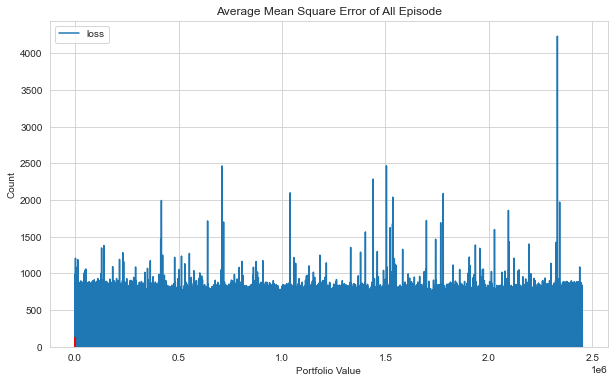

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

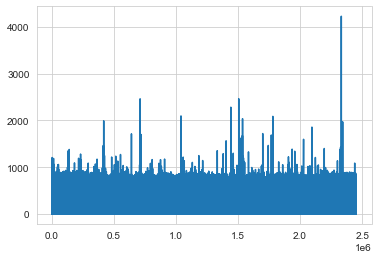

In [5]:
plt.plot(agent.model.losses)

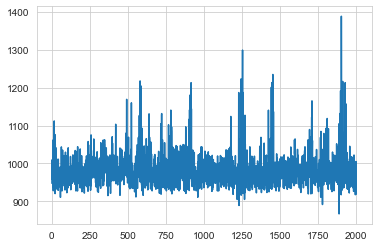

In [6]:
plt.plot(portfolio_value)

episode end value: 1244.73, duration: 0:00:00.133032
Sell: 225 times, Buy: 181 times


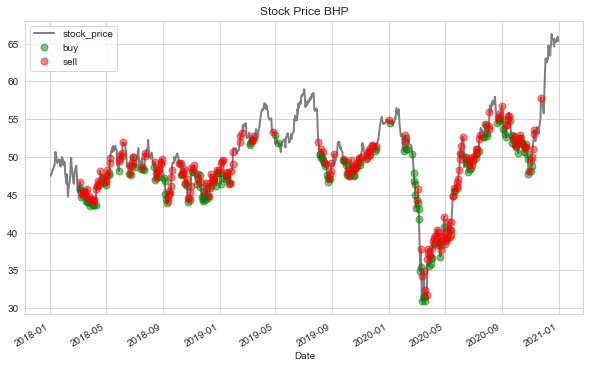

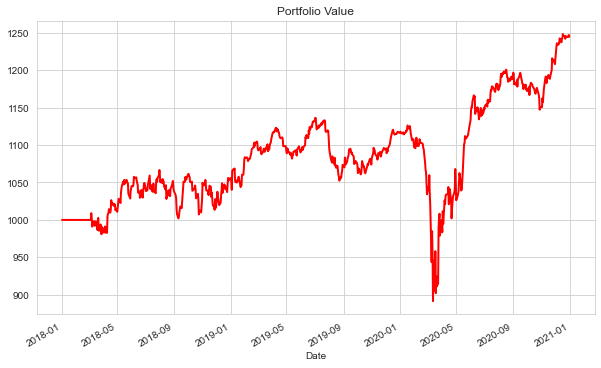

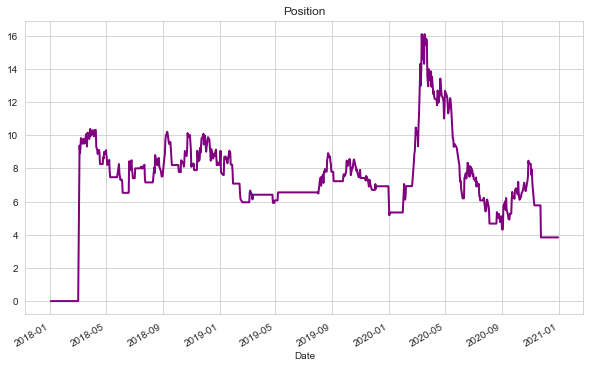

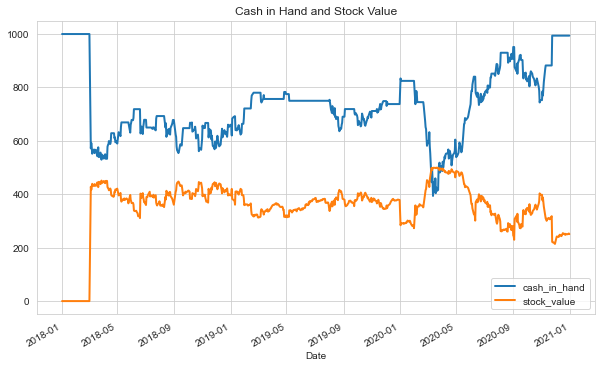

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BHP
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.57 %
Volatility: 0.1467
shape ratio: 0.4411
Maximun drawdown: -21.55 %
Calmar ratio: 0.3513
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 11.20 %
Volatility (benchmark): 0.3491
shape ratio: 0.2893
Maximun drawdown: -47.55 %
Calmar ratio (benchmark): 0.2355


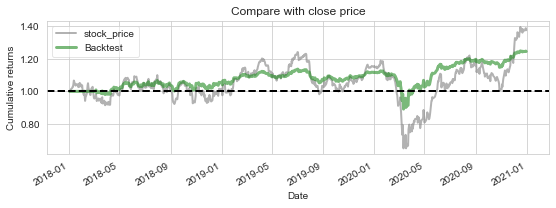

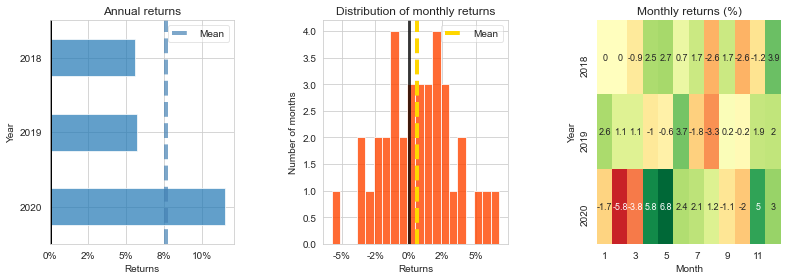

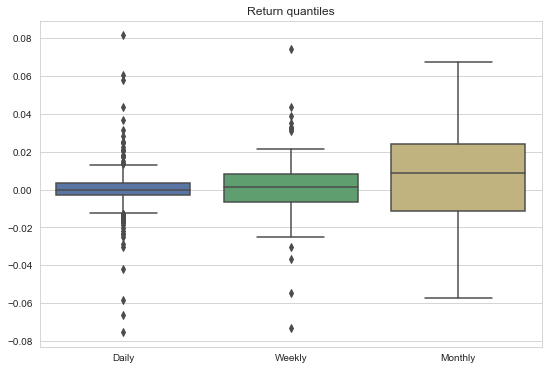

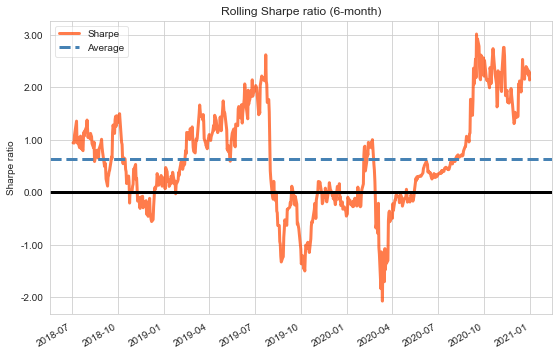

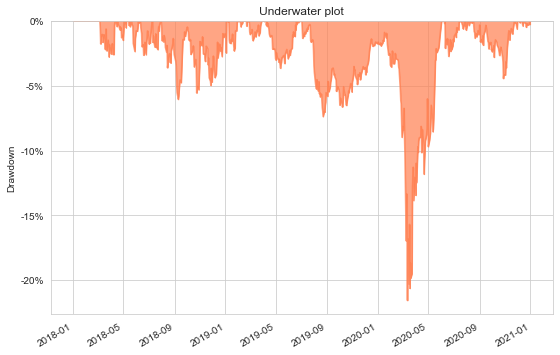

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')